### 2T - Linear Regression

Dataset: https://www.kaggle.com/competitions/playground-series-s3e14

Maestrante: Daniel Patricio Olivera Flores
 
 Contenido del Dataframe:

* Descripción de las Características
* Clonesize m2 - El tamaño promedio del clon de arándano en el campo
* Honeybee abejas/m2/min - Densidad de abejas melíferas en el campo
* Bumbles abejas/m2/min - Densidad de abejorros en el campo
* Andrena abejas/m2/min - Densidad de abejas Andrena en el campo
* Osmia abejas/m2/min - Densidad de abejas Osmia en el campo
* MaxOfUpperTRange ℃ - El registro más alto de la temperatura diaria del aire en la banda superior durante la temporada de floración
* MinOfUpperTRange ℃ - El registro más bajo de la temperatura diaria del aire en la banda superior
* AverageOfUpperTRange ℃ - El promedio de la temperatura diaria del aire en la banda superior
* MaxOfLowerTRange ℃ - El registro más alto de la temperatura diaria del aire en la banda inferior durante la temporada de floración
* MinOfLowerTRange ℃ - El registro más bajo de la temperatura diaria del aire en la banda inferior
* AverageOfLowerTRange ℃ - El promedio de la temperatura diaria del aire en la banda inferior
* RainingDays Day - El número total de días durante la temporada de floración, cada uno de los cuales tiene precipitaciones mayores a cero
* AverageRainingDays Day - El promedio de días lluviosos de toda la temporada de floración
* Fruitset - peso fruta mas semilla
* Fruitmass - Peso de la fruta
* Seeds - Kilogramos de semillas por hectarea Kg/Ha
* Yield - Kilogramos por hectarea Kg/Ha

In [1]:
#Importamos las librerias necesarias

import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.gridspec import GridSpec
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Funcion para cargar desde un archivo zip los archivos csv y guardarlos en un diccionario

def descomprimir_y_cargar_csv(archivo_zip, directorio_destino='.'):
    dataframes = {}

    with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
        zip_ref.extractall(directorio_destino)

        for nombre_archivo in zip_ref.namelist():
            if nombre_archivo.endswith('.csv'):
                nombre_variable = os.path.splitext(os.path.basename(nombre_archivo))[0]
                ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
                dataframes[nombre_variable] = pd.read_csv(ruta_archivo)
    
    return dataframes


In [3]:
#Pasamos el nombre del archivo zip que contiene los archivos csv a la funcion descomprimir_y_cargar_csv

archivo_zip = 'playground-series-s3e14.zip'
dataframes = descomprimir_y_cargar_csv(archivo_zip)
print(dataframes.keys())


dict_keys(['sample_submission', 'test', 'train'])


In [4]:
#Del diccionario de dataframes, seleccionamos el dataframe train y lo guardamos en una variable df_train
#Imprimimos la cantidad de filas y columnas del dataframe train

df_train= dataframes['train']
print("El dataset train tiene: {} filas y {} columnas".format(df_train.shape[0], df_train.shape[1]))
df_head_train = df_train.head()
df_describe_train = df_train.describe()
print(df_head_train, "\n")
print(df_describe_train)

El dataset train tiene: 15289 filas y 18 columnas
   id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange 

In [5]:
#descripcion de las columnas del dataframe train

df_test= dataframes['test']
print("El dataset test tiene: {} filas y {} columnas".format(df_test.shape[0], df_test.shape[1]))
df_head_test = df_test.head()
df_describe_test = df_test.describe()
print(df_head_test, "\n")
print(df_describe_test)

El dataset test tiene: 10194 filas y 17 columnas
      id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0  15289       25.0      0.25     0.25     0.25   0.25              86.0   
1  15290       12.5      0.25     0.25     0.75   0.63              94.6   
2  15291       12.5      0.25     0.25     0.63   0.63              86.0   
3  15292       25.0      0.50     0.38     0.38   0.63              86.0   
4  15293       37.5      0.75     0.25     0.25   0.25              94.6   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              57.2                  79.0              68.2              33.0   
2              52.0                  71.9              62.0              30.0   
3              52.0                  71.9              62.0              30.0   
4              57.2                  79.0              68.2              33.0   

   Aver

In [6]:
print(df_train.dtypes,'\n')
valores_nulos_train = df_train.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos_train)
total_valores_nulos_train = valores_nulos_train.sum()
if total_valores_nulos_train > 0:
    print(f"Total de valores nulos en el DataFrame: {total_valores_nulos_train}")
else:
    print("No existen valores nulos en el DataFrame.")
    
    

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object 

Cantidad de valores nulos por columna:
id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruit

In [7]:
print(df_test.dtypes,'\n')
valores_nulos_test = df_test.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos_test)
total_valores_nulos_test = valores_nulos_test.sum()
if total_valores_nulos_test > 0:
    print(f"Total de valores nulos en el DataFrame: {total_valores_nulos_test}")
else:
    print("No existen valores nulos en el DataFrame.")

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
dtype: object 

Cantidad de valores nulos por columna:
id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass  

In [8]:
def calcular_varianza(dataframe):
    varianza = dataframe.var()
    varianza = varianza.apply(lambda x: format(x, '.10f'))
    return varianza

varianzas = calcular_varianza(df_train)
print(varianzas)
varianzas = calcular_varianza(df_test)
print(varianzas)

id                      19480734.1666666679
clonesize                     43.4968062371
honeybee                       0.1307857308
bumbles                        0.0035900360
andrena                        0.0219380587
osmia                          0.0194571891
MaxOfUpperTRange              83.6621674453
MinOfUpperTRange              30.7626082856
AverageOfUpperTRange          58.3972216183
MaxOfLowerTRange              43.7005560460
MinOfLowerTRange              10.2103675902
AverageOfLowerTRange          29.0579781339
RainingDays                  135.8992221984
AverageRainingDays             0.0268647861
fruitset                       0.0055338127
fruitmass                      0.0013716129
seeds                         16.2496593182
yield                    1787721.0195849969
dtype: object
id                      8660652.5000000000
clonesize                    43.4526727643
honeybee                      0.1521173463
bumbles                       0.0035840036
andrena               

El conjunto de datos entregados para la compentencia/estudio cuenta con 3 datos tabulares dict_keys(['sample_submission', 'test', 'train']), donde se tiene dividido el test.csv y el train.csv en dos sets de datos tabulares, sample_submission es un ejemplo de como entregar el test.csv a Kaggle por lo que no se tomara en cuenta para realizar el EDA, tambien hay que tomar en consideracion que solamente train.csv tiene la caracteristica yield entre sus features.

### Histograma y Scatterplot

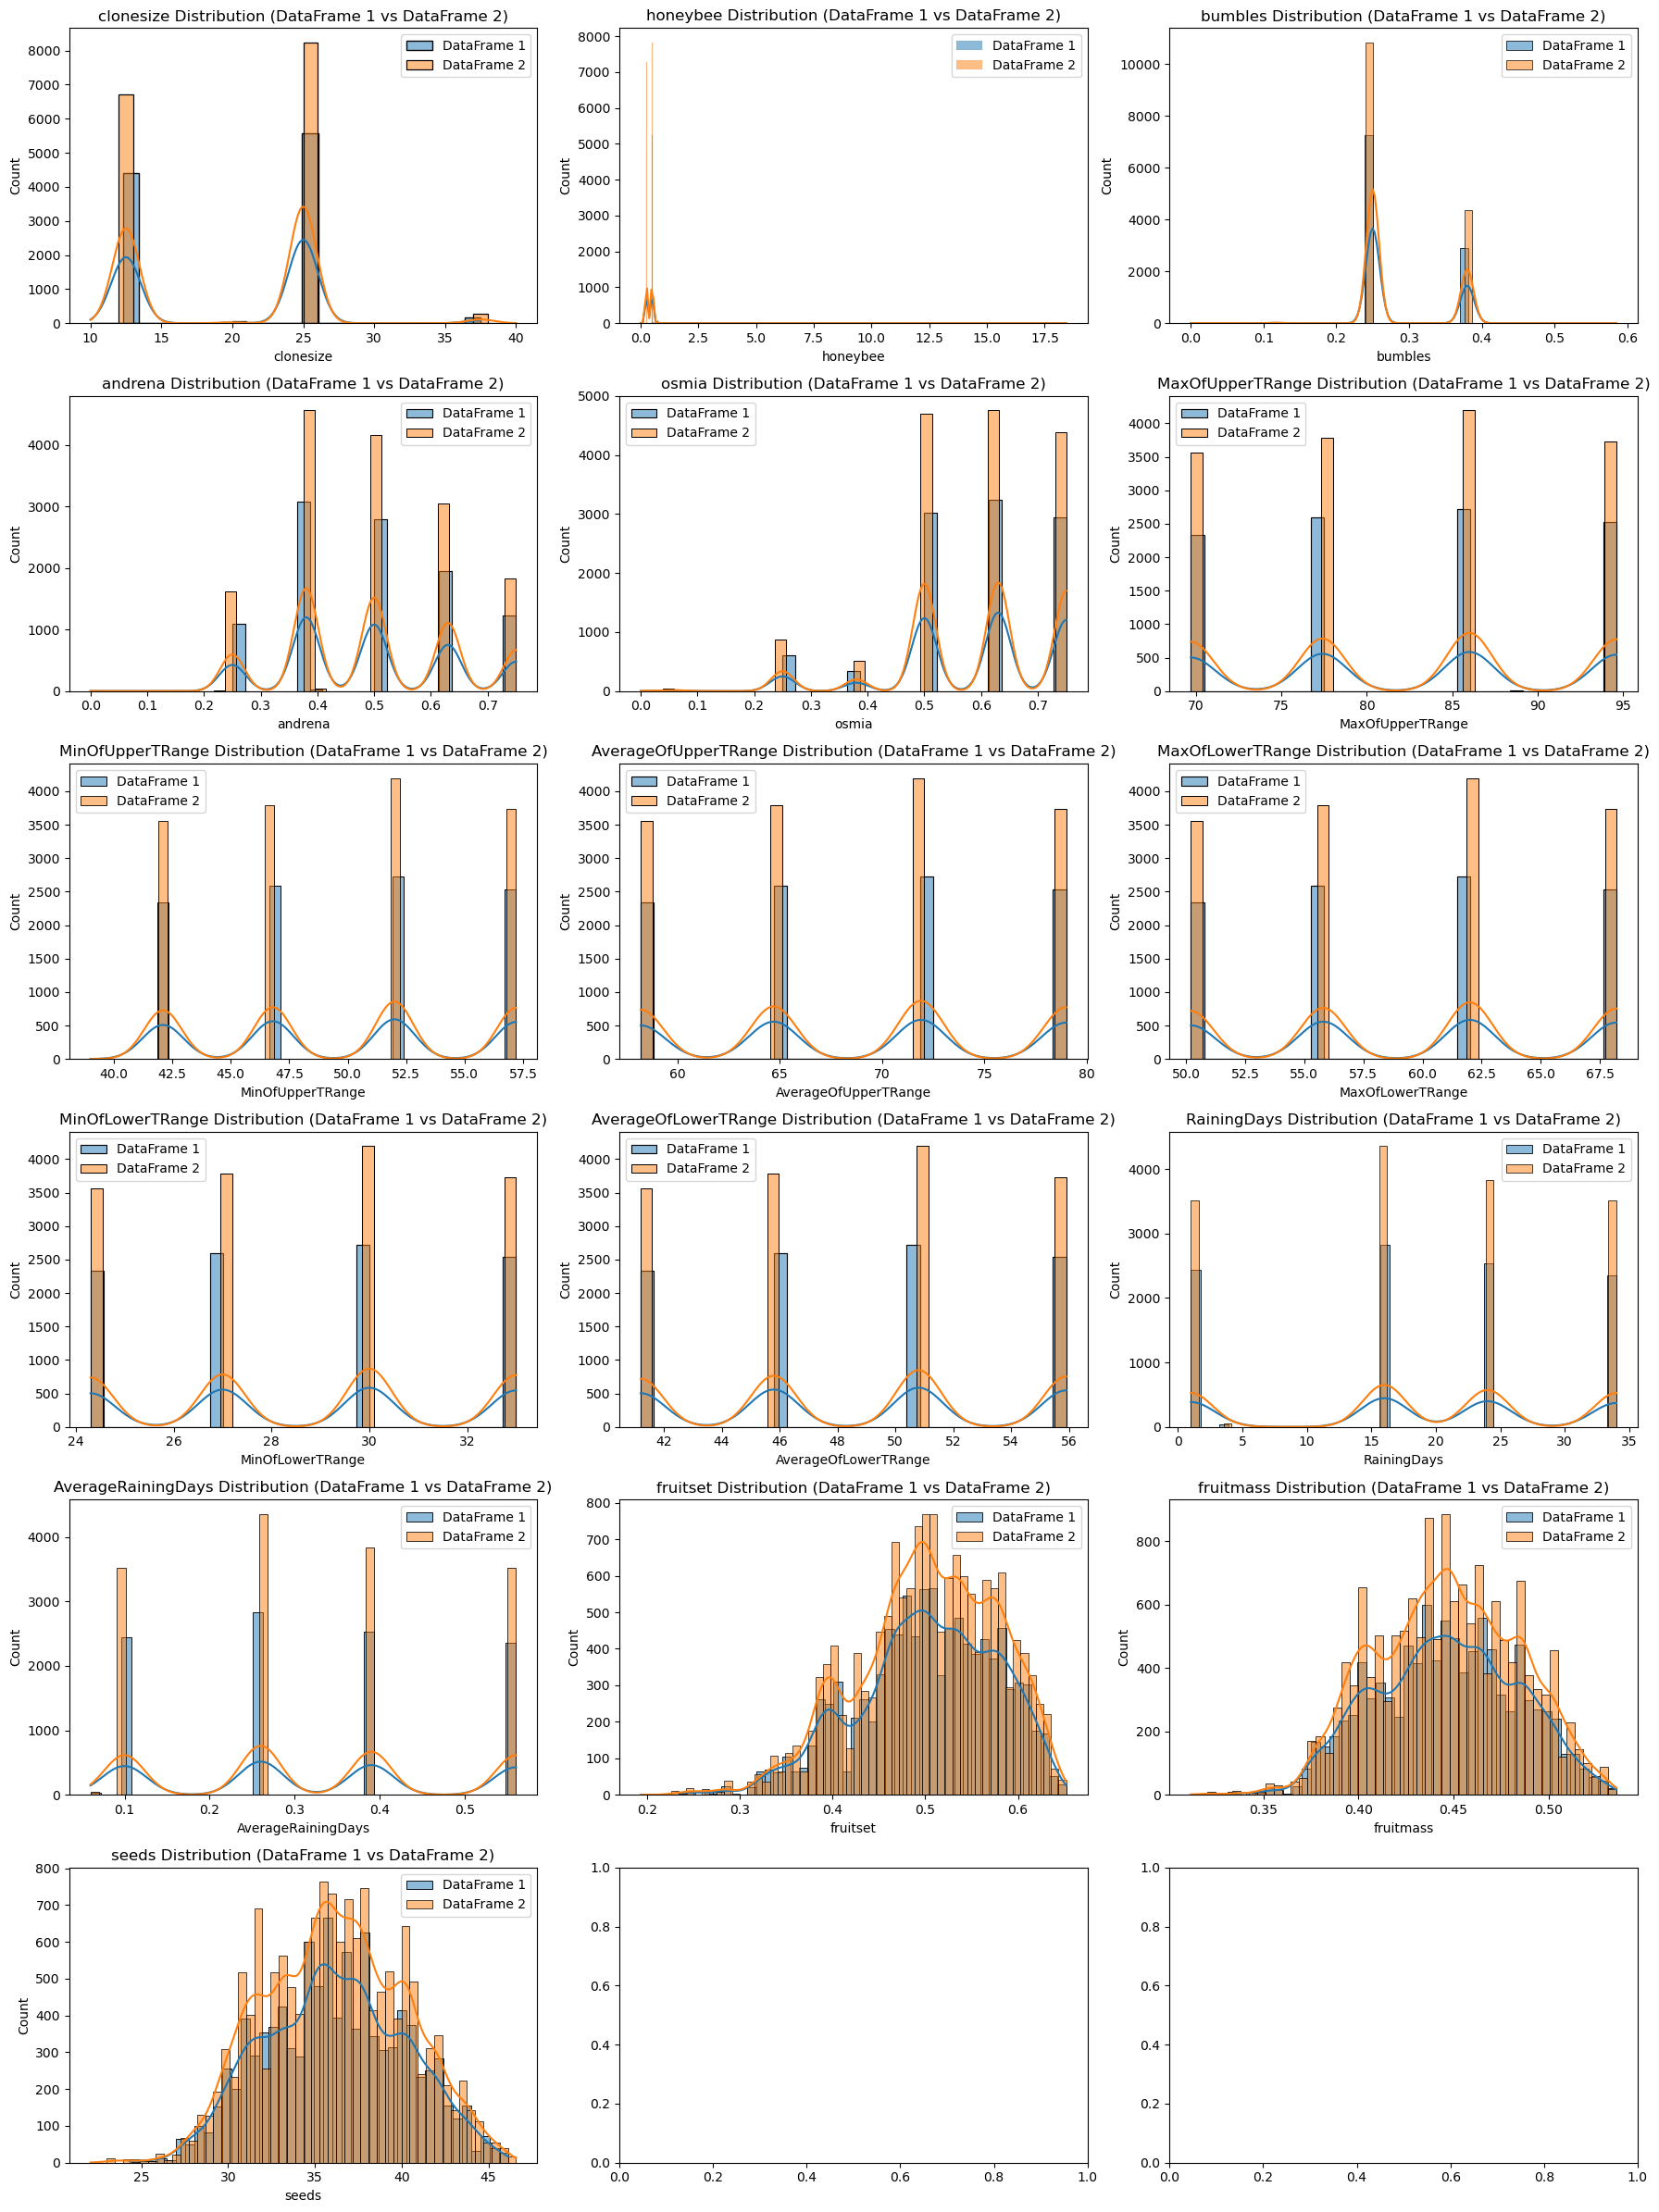

In [9]:
#funcion que compara los histogramas de dos dataframes y los grafica en un mismo grafico (df_train y df_test)

df_test=df_test.drop(['id'], axis=1)
df_train=df_train.drop(['id'], axis=1)
def comparar_histogramas(df1, df2, n_cols=3):
    n_rows = (len(df1.columns)) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df1.columns):
        ax = axes[i]
        sns.histplot(df1[var_name], kde=True, ax=ax, label='DataFrame 1', alpha=0.5)
        sns.histplot(df2[var_name], kde=True, ax=ax, label='DataFrame 2', alpha=0.5)
        ax.set_title(f'{var_name} Distribution (DataFrame 1 vs DataFrame 2)')
        ax.legend()

    plt.tight_layout()
    plt.show()

comparar_histogramas(df_test, df_train)

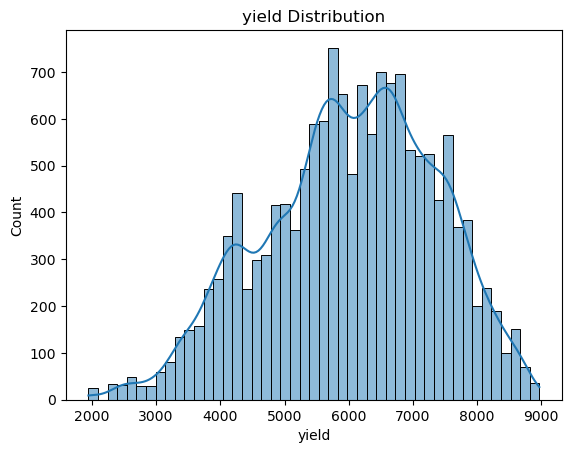

In [10]:
#Distribucion de la variable yield

target_col = 'yield'
sns.histplot(df_train[target_col], kde=True)
plt.title(f'{target_col} Distribution')
plt.show()

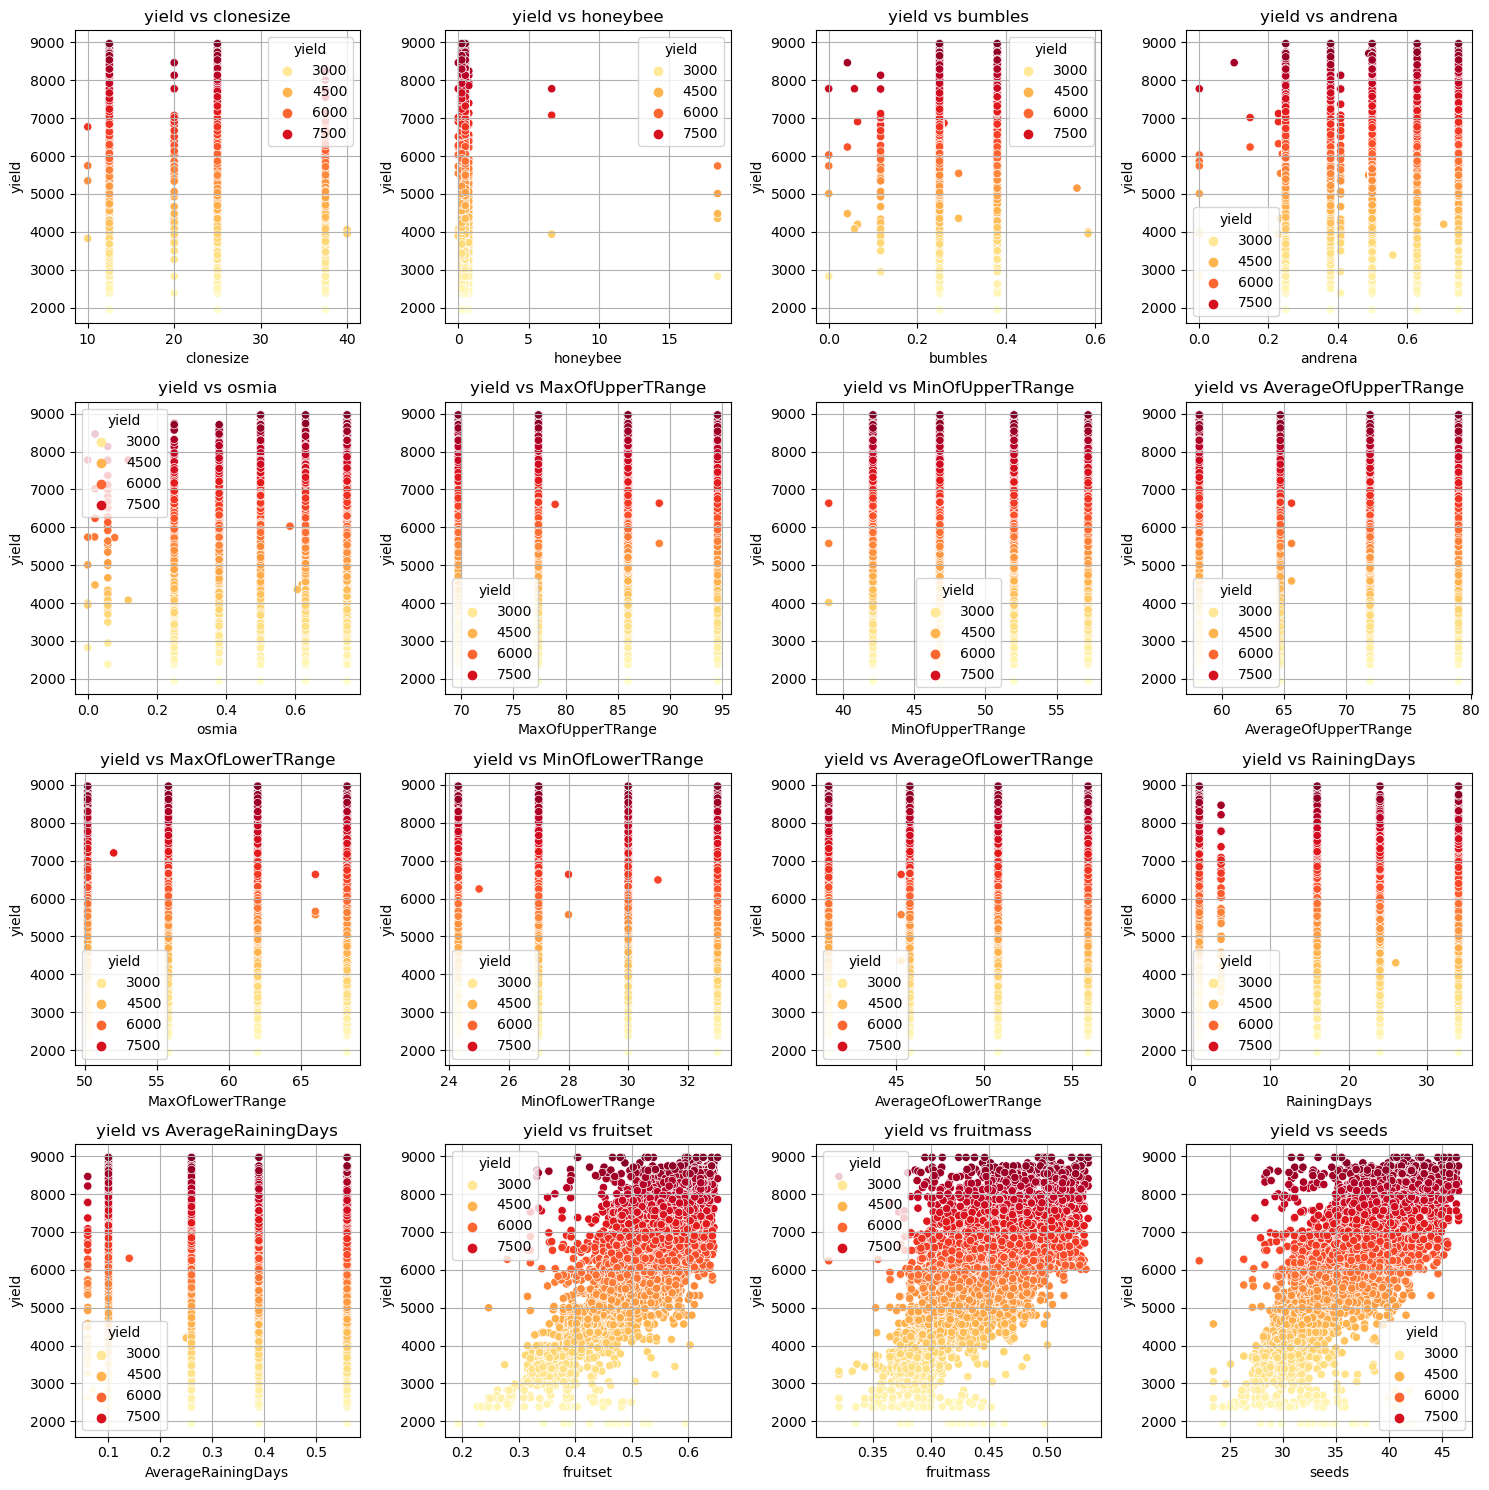

In [11]:
#funcion para graficar scatterplots de las variables del dataframe train vs la variable target

def scatter_plots_yield_vs_features(df, target_col='yield'):
    features = [col for col in df.columns if col != target_col]
    n_cols = 4
    n_rows = (len(features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.scatterplot(data=df, x=feature, y=target_col, hue=target_col, palette='YlOrRd', ax=ax)
        ax.grid(True)
        ax.set_title(f'{target_col} vs {feature}')

    plt.tight_layout()
    plt.show()
    
scatter_plots_yield_vs_features(df_train, target_col='yield')

### Jointplot

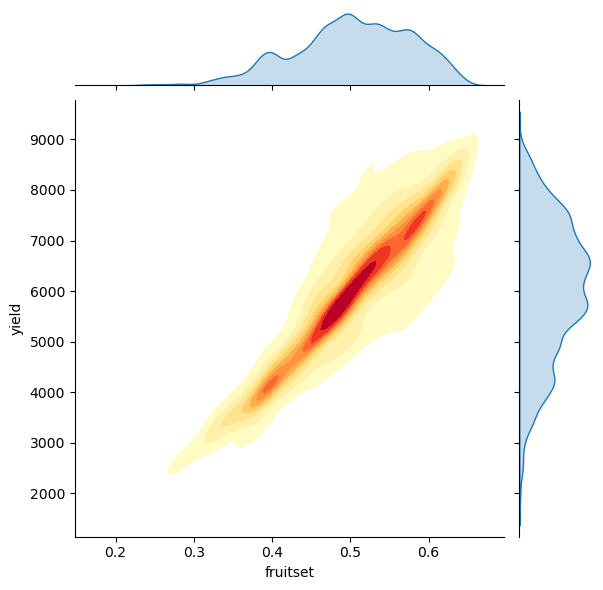

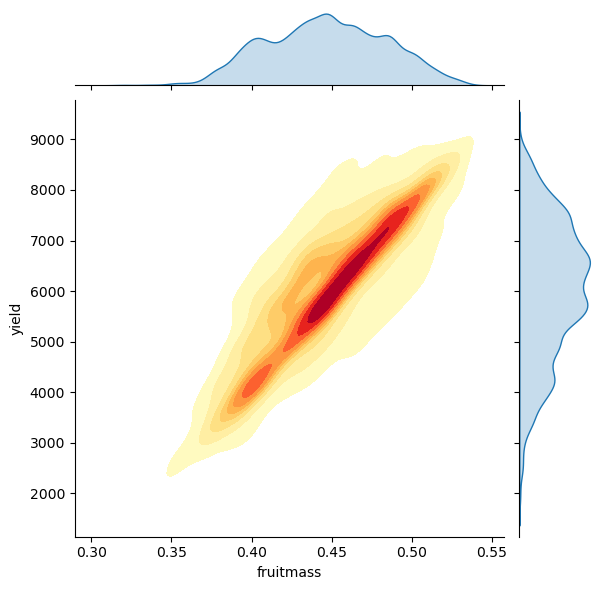

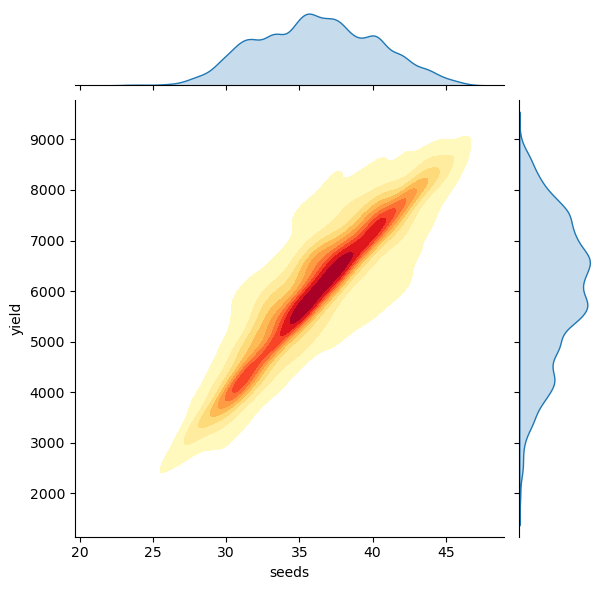

In [12]:
#Funcion que grafica un jointplot de las variables del dataframe train vs la variable target

def plot_jointplot(df, y_col, columns, kinds):
    for column in columns:
        sns.jointplot(data=df, x=column, y=y_col, kind=kinds, cmap='YlOrRd', fill=True)
        plt.xlabel(column)
        plt.ylabel(y_col)
        plt.show()

columnas = df_train.iloc[:, -4:-1].columns
plot_jointplot(df_train, 'yield', columnas, 'kde')


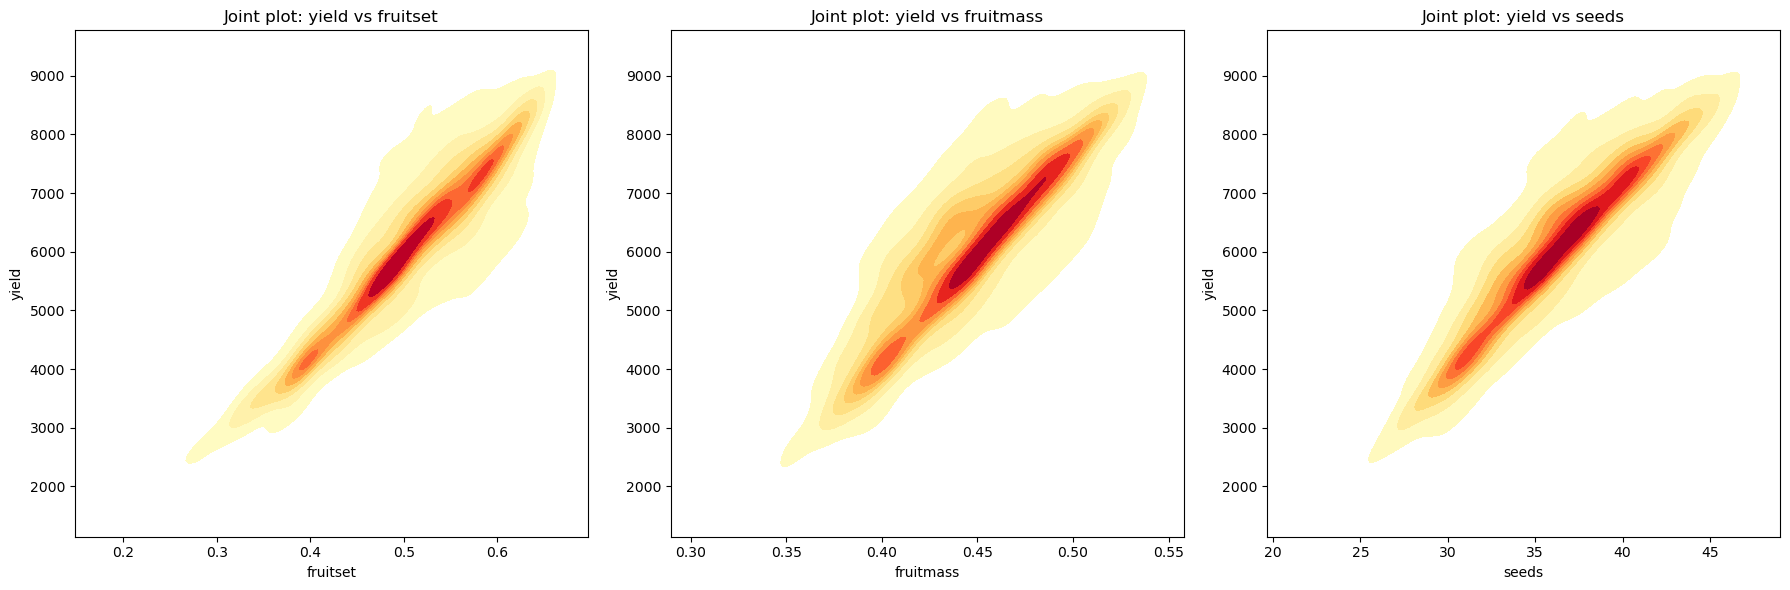

In [13]:
def plot_jointplot(df, y_col, columns):
    n_columns = len(columns)
    fig = plt.figure(figsize=(6 * n_columns, 6))
    grid = GridSpec(1, n_columns, figure=fig)
    
    for i, column in enumerate(columns):
        ax_joint = fig.add_subplot(grid[0, i])
        ax_marg_x = fig.add_subplot(grid[0, i], sharex=ax_joint)
        ax_marg_y = fig.add_subplot(grid[0, i], sharey=ax_joint)
        sns.kdeplot(data=df, x=column, y=y_col, ax=ax_joint, cmap='YlOrRd', fill=True)
        ax_joint.set_title(f'Joint plot: {y_col} vs {column}')
        ax_marg_x.set_axis_off()
        ax_marg_y.set_axis_off()

    plt.tight_layout()
    plt.show()
    
columnas = df_train.iloc[:, -4:-1].columns
plot_jointplot(df_train, 'yield', columnas)

### Correlacion de features

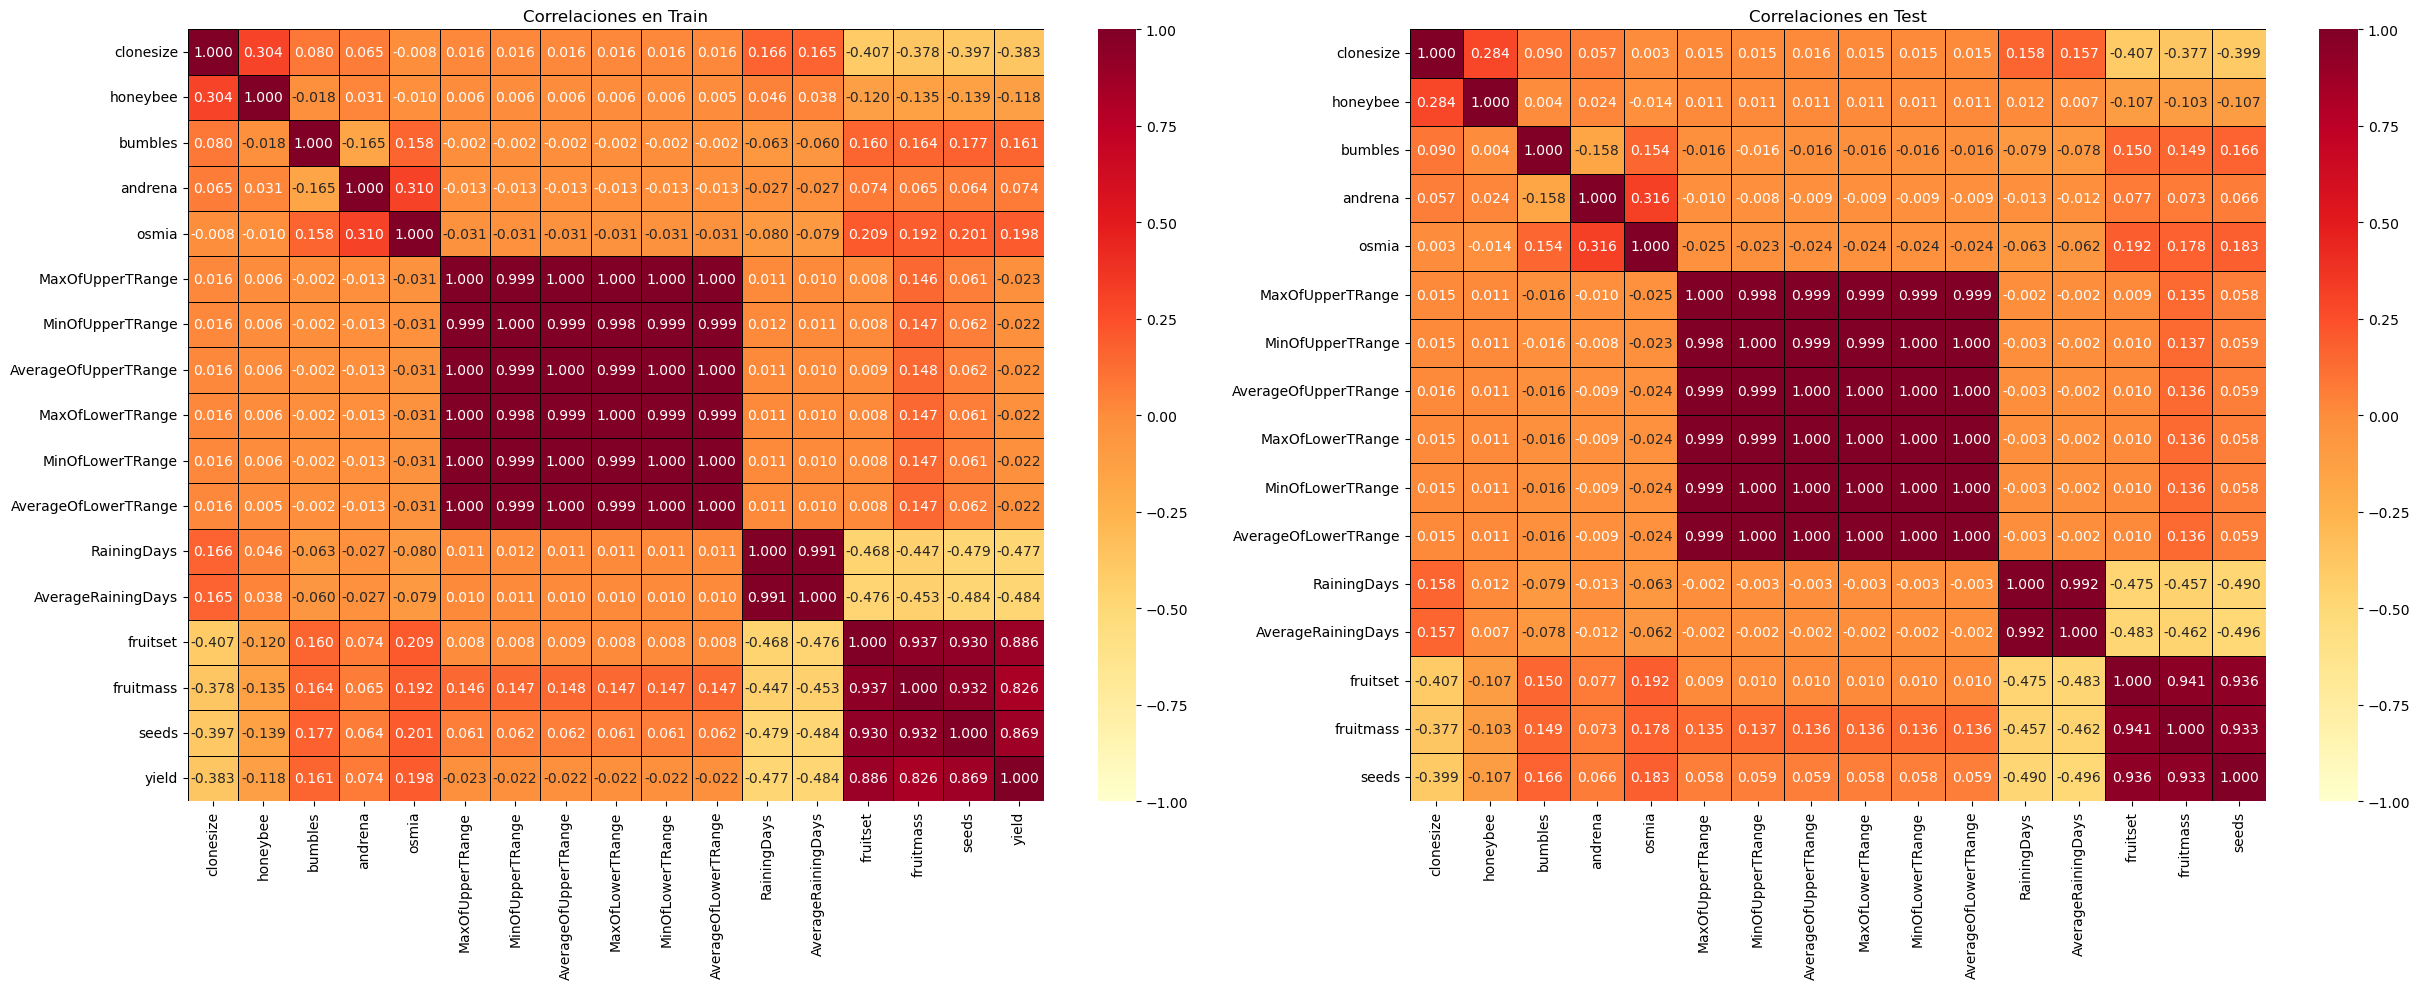

In [14]:
#Funcion que grafica la correlacion entre las variables del dataframe train y test

def graficar_correlaciones(df1, df2):
    corr1 = df1.corr()
    corr2 = df2.corr()

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

    sns.heatmap(corr1, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, ax=ax1, fmt='.3f', linewidths=0.5, linecolor="black")
    ax1.set_title('Correlaciones en Train')

    sns.heatmap(corr2, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, ax=ax2, fmt='.3f', linewidths=0.5, linecolor="black")
    ax2.set_title('Correlaciones en Test')

    plt.tight_layout()
    plt.show()
    
graficar_correlaciones(df_train, df_test)

### Estandarizar y normalizar los dataframes (Preparando los DF)

In [15]:
def standardize_and_normalize(df):
    # Estandarizar
    scaler_std = StandardScaler()
    df_standardized = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

    # Normalizar
    scaler_norm = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler_norm.fit_transform(df), columns=df.columns)

    return df_standardized, df_normalized, scaler_std, scaler_norm

df_train_std, df_train_norm, scaler_std_train, scaler_norm_train = standardize_and_normalize(df_train)
df_test_std, df_test_norm, scaler_std_test, scaler_norm_test = standardize_and_normalize(df_test)

In [16]:
df_train_std.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0.802929,0.306073,-0.613664,1.737386,-0.662120,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.458012,0.401611,-1.044938,-0.783260,-0.918905,-1.158091
1,0.802929,0.306073,-0.613664,0.049454,-0.662120,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.458012,0.401611,-0.777454,-0.661588,-0.572230,-0.356819
2,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.418756,0.419514,0.424487,0.419105,0.419198,0.413979,0.458012,0.401611,0.674659,0.656157,0.540029,0.631694
3,-1.092448,-0.385238,-0.613664,0.927179,-0.662120,-0.521504,-0.518061,-0.517729,-0.518808,-0.519692,-0.513601,0.458012,0.401611,0.850087,0.852832,0.819312,0.639920
4,0.802929,0.306073,-0.613664,0.927179,0.269883,-0.521504,-0.518061,-0.517729,-0.518808,-0.519692,-0.513601,0.458012,0.401611,1.034261,1.285628,1.071598,1.088052


### Regresion lineal, RIDGE, LASSO y K-Fold cross validation 

In [17]:
#Preparando los datos para el modelo

X = df_train_std.drop('yield', axis=1)
y = df_train_std['yield']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)
print("Instancias X_train dataset: ", X_train.shape)
print("Instancias y_train dataset: ", y_train.shape)
print("Instancias X_test dataset: ", X_test.shape)
print("Instancias y_test dataset: ", y_test.shape,'\n')


Shape of X: (15289, 16)
Shape of y: (15289,)
Instancias X_train dataset:  (10702, 16)
Instancias y_train dataset:  (10702,)
Instancias X_test dataset:  (4587, 16)
Instancias y_test dataset:  (4587,) 



Los scores se calculan dentro de la misma funcion "create_linear_regression_model", acorde al plan de estudio se aplico LASSO, RIDGE Y K-FOLD

In [18]:
#Funcion que crea un modelo de regresion lineal (LinearRegression) y calcula el RMSE

def create_linear_regression_model(X_train, y_train, cv=5):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"Mean RMSE de {cv}-Fold Cross Validation: {avg_rmse}")

    return lr_model

linear_model_1 = create_linear_regression_model(X_train, y_train, cv=10)

Mean RMSE de 10-Fold Cross Validation: 0.49078029401184053


In [19]:
#Funcion que crea un modelo de regresion lineal (LinearRegression, Ridge, lasso) y calcula el RMSE

def create_regression_models(X_train, y_train, alpha_ridge=1.0, alpha_lasso=1.0, cv=5):
    # Crear y entrenar el modelo de regresión lineal
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    #Ridge
    ridge_model = Ridge(alpha=alpha_ridge)
    ridge_model.fit(X_train, y_train)

    #Lasso
    lasso_model = Lasso(alpha=alpha_lasso)
    lasso_model.fit(X_train, y_train)

    # Validación cruzada K-Fold
    for model_name, model in [('Linear Regression', lr_model), ('Ridge', ridge_model), ('Lasso', lasso_model)]:
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        avg_rmse = np.mean(rmse_scores)
        print(f"{model_name} Mean RMSE de {cv}-Fold Cross Validation: {avg_rmse}")

    return lr_model, ridge_model, lasso_model

linear_model_2, ridge_model, lasso_model = create_regression_models(X_train, y_train, alpha_ridge=1.0, alpha_lasso=1.0, cv=10)

Linear Regression Mean RMSE de 10-Fold Cross Validation: 0.49078029401184053
Ridge Mean RMSE de 10-Fold Cross Validation: 0.4429933676568867
Lasso Mean RMSE de 10-Fold Cross Validation: 0.9978260887503512


In [20]:
#Realizando predicciones con el modelo de regresion lineal diractamente con el dataframe de test

y_pred = linear_model_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82


In [21]:
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'R^2': r2}

metrics = calculate_metrics(linear_model_1, X_test, y_test)
print(f"Mean Squared Error: {metrics['MSE']:.2f}")
print(f"Root Mean Squared Error: {metrics['RMSE']:.2f}")
print(f"R^2: {metrics['R^2']:.2f}")

Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82


In [22]:
models = {
    'Linear Regression 1': linear_model_1,
    'Linear Regression 2': linear_model_2,  
    'Ridge': ridge_model,
    'Lasso': lasso_model    
}
print('Modelos entrenados: ', models.keys(), '\n')
   
for model_name, model in models.items():
    print(f"Modelo: {model_name}")
    metrics = calculate_metrics(model, X_test, y_test)
    print(f"Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"Root Mean Squared Error: {metrics['RMSE']:.2f}")
    print(f"R^2: {metrics['R^2']:.2f}")
    print()  

Modelos entrenados:  dict_keys(['Linear Regression 1', 'Linear Regression 2', 'Ridge', 'Lasso']) 

Modelo: Linear Regression 1
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Modelo: Linear Regression 2
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Modelo: Ridge
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Modelo: Lasso
Mean Squared Error: 1.01
Root Mean Squared Error: 1.00
R^2: -0.00



Linear Regression 1, así como Linear Regression 2, Ridge & Lasso no son buenos modelos para la predicción de producción de kilogramos de arándanos por hectarea ['yield']

In [23]:
print(models.keys())
dict_reg_1 = models['Linear Regression 1']

dict_keys(['Linear Regression 1', 'Linear Regression 2', 'Ridge', 'Lasso'])


El df_test no contiene el target 'yield' por lo que son regresiones sobre data a la cual no se le pueden aplicar metricas

In [24]:
y_pred_df_test_std = dict_reg_1.predict(df_test_std)
y_pred_desescalado = y_pred_df_test_std * scaler_std_test.scale_[-1] + scaler_std_test.mean_[-1]
print(f"Predicciones del modelo sobre el dataset test:", '\n')
print(f"Predicciones del modelo {dict_reg_1}: {y_pred_desescalado}")


Predicciones del modelo sobre el dataset test: 

Predicciones del modelo LinearRegression(): [30.9924604  36.36360555 39.82770031 ... 38.92320476 31.42114493
 40.05773678]
